In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("netflix_titles.csv")

## Numpy & Pandas Operations

In [3]:
df.head()
print("Shape:", df.shape)
print(df.info())
print(df.isnull().sum())
print(df.describe())
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['cast'] = df['cast'].fillna('No data')
df['director'] = df['director'].fillna('No data')
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df = df.dropna(subset=['rating'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month_name()
movies = df[df['type'] == 'Movie']
movies['duration_num'] = pd.to_numeric(movies['duration'].str.replace(' min','', regex=False), errors='coerce')
avg_duration = movies['duration_num'].mean()
print("Average Movie Duration:", avg_duration)

Shape: (8807, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          

C:\Users\POOJASRIMENDU\AppData\Local\Temp\ipykernel_3816\764672593.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration_num'] = pd.to_numeric(movies['duration'].str.replace(' min','', regex=False), errors='coerce')


## Matplotlib & Seaborn Operations

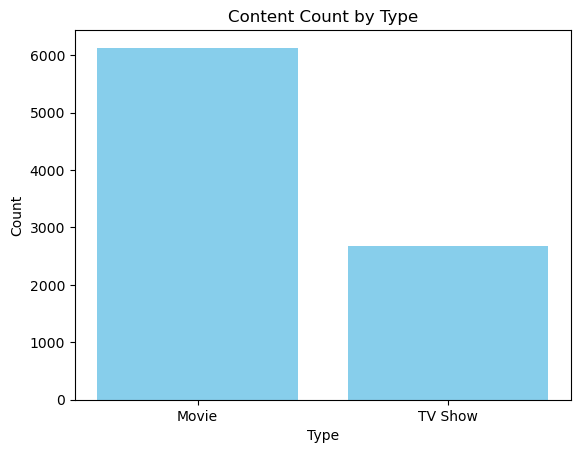

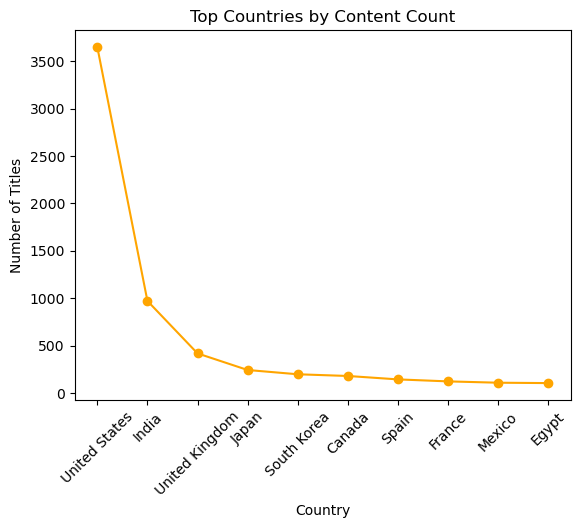

C:\Users\POOJASRIMENDU\AppData\Local\Temp\ipykernel_3816\929918490.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration_num'] = pd.to_numeric(movies['duration'].str.replace(' min','', regex=False), errors='coerce')


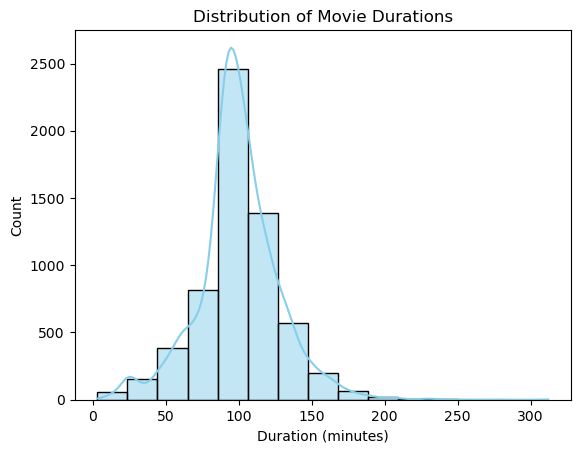

C:\Users\POOJASRIMENDU\AppData\Local\Temp\ipykernel_3816\929918490.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette='Set2')


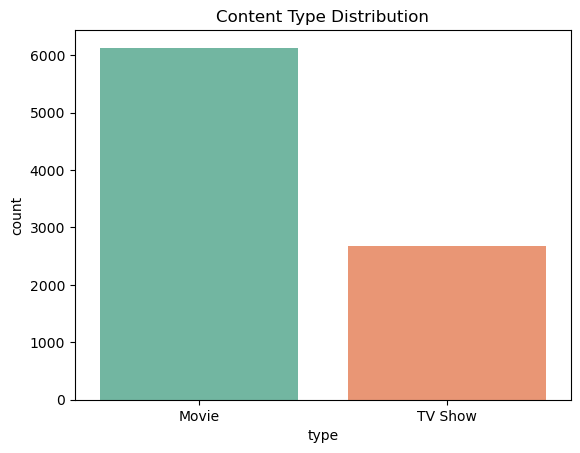

C:\Users\POOJASRIMENDU\AppData\Local\Temp\ipykernel_3816\929918490.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration_num'] = pd.to_numeric(movies['duration'].str.replace(' min','', regex=False), errors='coerce')
C:\Users\POOJASRIMENDU\AppData\Local\Temp\ipykernel_3816\929918490.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type', y='duration_num', data=movies, palette='Set1')


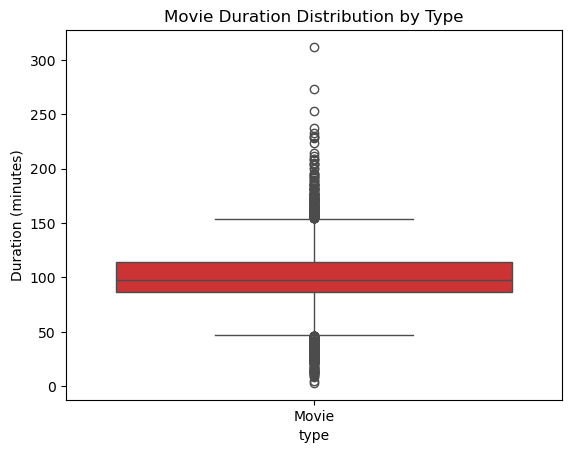

C:\Users\POOJASRIMENDU\AppData\Local\Temp\ipykernel_3816\929918490.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration_num'] = pd.to_numeric(movies['duration'].str.replace(' min','', regex=False), errors='coerce')


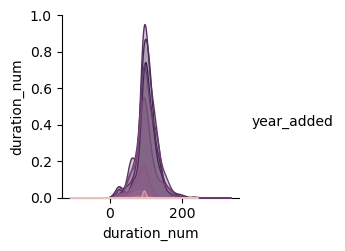

C:\Users\POOJASRIMENDU\AppData\Local\Temp\ipykernel_3816\929918490.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration_num'] = pd.to_numeric(movies['duration'].str.replace(' min','', regex=False), errors='coerce')


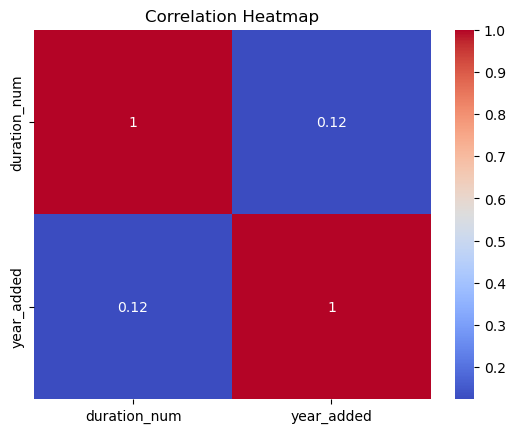

In [4]:
#Bar chart
content_count = df['type'].value_counts()
types = content_count.index
counts = content_count.values
plt.bar(types, counts, color='skyblue')
plt.title("Content Count by Type")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()
#Line Plot
top_countries = df.groupby('country')['rating'].count().sort_values(ascending=False).head(10)
plt.plot(top_countries.index, top_countries.values, marker='o', color='orange')
plt.title("Top Countries by Content Count")
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.show()
#Histogram
movies = df[df['type']=='Movie']
movies['duration_num'] = pd.to_numeric(movies['duration'].str.replace(' min','', regex=False), errors='coerce')
sns.histplot(movies['duration_num'], bins=15, kde=True, color='skyblue')
plt.title("Distribution of Movie Durations")
plt.xlabel("Duration (minutes)")
plt.ylabel("Count")
plt.show()
#Count Plot
sns.countplot(x='type', data=df, palette='Set2')
plt.title("Content Type Distribution")
plt.show()
#Box Plot
movies = df[df['type']=='Movie']
movies['duration_num'] = pd.to_numeric(movies['duration'].str.replace(' min','', regex=False), errors='coerce')
sns.boxplot(x='type', y='duration_num', data=movies, palette='Set1')
plt.title("Movie Duration Distribution by Type")
plt.ylabel("Duration (minutes)")
plt.show()
#Pair Plot
movies = df[df['type']=='Movie']
movies['duration_num'] = pd.to_numeric(movies['duration'].str.replace(' min','', regex=False), errors='coerce')
sns.pairplot(movies[['duration_num','year_added']], hue='year_added')
plt.show()
#HeatMap
movies = df[df['type']=='Movie']
movies['duration_num'] = pd.to_numeric(movies['duration'].str.replace(' min','', regex=False), errors='coerce')
movies_numeric = movies[['duration_num','year_added']].dropna()
corr = movies_numeric.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()